Table of contents

1. Create bare-bones minerva model

2. Replicate original paper finding (requires better interface)

3. Create rhythm/tone experiment with fixed
    - rhythm/tone split
    - number participants
    - participant stimuli

4. Make experiment configurable

5. Run a bazillion experiments

# Bare-bones Minerva2 model

In [246]:
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import norm

In [4]:
len([val for val in np.unique(np.array((1,0,-1,1, 1, 1, 1, 0))) if val not in (-1, 0, 1)])

0

## The Model (v0.1)

In [292]:
class Minerva2:
    def __init__(self, features_per_trace):
        self.features_per_trace = features_per_trace
        self.model = None
        
    def get_activation(self, probe, trace):
        '''
        also returns similarity in 2nd return value
        '''
        # the @ symbol denotes a "dot product," which is the same as 
        # sum([probe[i] * self.model[trace_idx][i] for i in range(len(probe))])
        similarity = (probe @ trace) / len(probe)
        return similarity**3, similarity
        
    def get_activation_by_idx(self, probe, trace_idx):
        return self.get_activation(probe, self.model[trace_idx], return_sim)
    
    def get_echo_intensity(self, probe, return_all=False):
        activations = []
        similarities = []
        for trace in self.model:
            activation, similarity = self.get_activation(probe, trace)
            activations.append(activation)
            similarities.append(similarity)
        
        if return_all:
            return sum(activations) / len(activations), activations, similarities
        else:
            return sum(activations) / len(activations)
        
    def get_echo_intensities(self, probes):
        if type(probes) != np.ndarray:
            raise Exception("Probes are not of type numpy array, fail.")
        model_arr = np.array(model.model)
        similarities = (probes @ model_arr.T)/probes.shape[1]
        activations = similarities**3
        intensities = np.mean(activations, axis=1)
        return intensities
    
    def add_trace(self, trace):
        if type(trace) != np.ndarray:
            raise Exception("Trace is not of type numpy array, fail.")
        if trace.shape != (self.features_per_trace,):
            raise Exception("Trace is not a one-dimensional array of length", self.features_per_trace, ", fail.")
        if len([x for x in trace if x not in (-1, 0, 1)]) > 0:
            raise Exception("Trace contains values besides -1, 0, or 1, fail.")
        reshaped = np.reshape(trace, (-1, self.features_per_trace))
        if self.model is not None:
            self.model = np.append(self.model, reshaped, axis=0)
        else:
            self.model = reshaped
    
    def add_traces(self, traces):
        if type(traces) != np.ndarray:
            raise Exception("Trace is not of type numpy array, fail.")
        if traces.shape[1] != self.features_per_trace:
            raise Exception("Trace is not a two-dimensional array of width", self.features_per_trace, ", fail.")
        if len([x for x in traces.flatten() if x not in (-1, 0, 1)]) > 0:
            raise Exception("Trace contains values besides -1, 0, or 1, fail.")
        if self.model is not None:
            self.model = np.append(self.model, traces, axis=0)
        else:
            self.model = traces

    def pretty_print(self, probe):
        '''
        Illustrates the calculation of echo intensity
        '''
        echo_intensity, activations, similarities = self.get_echo_intensity(probe, return_all=True)

        print('PROBE:', list(probe))
        for i in range(len(activations)):
            print('TRACE {}:'.format(i), list(self.model[i]), '->', '{:>6.3f}^3 = {:>8.3f}'.format(similarities[i], activations[i]))
        print('-'*80)
        print('{:>80.3f}'.format(echo_intensity))

## Try it out with some ZERO traces

In [6]:
model1_fpt = 10

In [7]:
model1 = Minerva2(model1_fpt)

In [8]:
for _ in range(10):
    rand_trace = np.zeros(model1_fpt)
    model1.add_trace(rand_trace)

In [9]:
model1.model

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]

Let's create a random probe to test

In [10]:
probe1 = np.random.randint(-1, 2, model1_fpt)
probe1

array([ 0, -1,  1,  0,  1,  1,  0,  1, -1,  1])

In [11]:
model1.get_echo_intensity(probe1, return_all=True)

(0.0,
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [12]:
model1.pretty_print(probe1)

PROBE: [0, -1, 1, 0, 1, 1, 0, 1, -1, 1]
TRACE 0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ->  0.000^3 =    0.000
TRACE 1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ->  0.000^3 =    0.000
TRACE 2: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ->  0.000^3 =    0.000
TRACE 3: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ->  0.000^3 =    0.000
TRACE 4: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ->  0.000^3 =    0.000
TRACE 5: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ->  0.000^3 =    0.000
TRACE 6: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ->  0.000^3 =    0.000
TRACE 7: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ->  0.000^3 =    0.000
TRACE 8: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ->  0.000^3 =    0.000
TRACE 9: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ->  0.000^3 =    0.000
--------------------------------------------------------------------------------
                                                 

Blank memory means a blank response! Looking good so far.

## Now test with random traces

In [13]:
model2_fpt = 8

In [14]:
model2 = Minerva2(model2_fpt)

In [15]:
for _ in range(12):
    rand_trace = np.random.randint(-1, 2, model2_fpt)
    model2.add_trace(rand_trace)

In [16]:
model2.model

[array([-1, -1,  0, -1, -1,  0,  1,  0]),
 array([-1,  0,  1,  0,  1, -1,  1, -1]),
 array([-1,  1, -1,  1,  1, -1, -1,  1]),
 array([-1,  1,  0,  1, -1,  0,  0,  1]),
 array([-1, -1,  0,  0,  1,  1,  1,  1]),
 array([-1, -1, -1,  1,  1,  0, -1,  0]),
 array([-1,  1, -1,  0,  0, -1,  1,  0]),
 array([ 0,  1, -1,  0,  1, -1, -1,  1]),
 array([-1, -1,  1,  0,  0, -1, -1,  1]),
 array([ 0, -1, -1,  1,  1,  0, -1, -1]),
 array([-1, -1, -1,  0, -1, -1,  1,  0]),
 array([-1, -1,  0, -1,  1, -1,  1, -1])]

And a random test probe...

In [17]:
probe2 = np.random.randint(-1, 2, model2_fpt)
probe2

array([ 0,  0,  1,  0,  1, -1,  0,  0])

In [18]:
model2.get_echo_intensity(probe2, return_all=True)

(0.0068359375,
 [-0.001953125,
  0.052734375,
  0.001953125,
  -0.001953125,
  0.0,
  0.0,
  0.0,
  0.001953125,
  0.015625,
  0.0,
  -0.001953125,
  0.015625],
 [-0.125, 0.375, 0.125, -0.125, 0.0, 0.0, 0.0, 0.125, 0.25, 0.0, -0.125, 0.25])

In [19]:
model2.pretty_print(probe2)

PROBE: [0, 0, 1, 0, 1, -1, 0, 0]
TRACE 0: [-1, -1, 0, -1, -1, 0, 1, 0] -> -0.125^3 =   -0.002
TRACE 1: [-1, 0, 1, 0, 1, -1, 1, -1] ->  0.375^3 =    0.053
TRACE 2: [-1, 1, -1, 1, 1, -1, -1, 1] ->  0.125^3 =    0.002
TRACE 3: [-1, 1, 0, 1, -1, 0, 0, 1] -> -0.125^3 =   -0.002
TRACE 4: [-1, -1, 0, 0, 1, 1, 1, 1] ->  0.000^3 =    0.000
TRACE 5: [-1, -1, -1, 1, 1, 0, -1, 0] ->  0.000^3 =    0.000
TRACE 6: [-1, 1, -1, 0, 0, -1, 1, 0] ->  0.000^3 =    0.000
TRACE 7: [0, 1, -1, 0, 1, -1, -1, 1] ->  0.125^3 =    0.002
TRACE 8: [-1, -1, 1, 0, 0, -1, -1, 1] ->  0.250^3 =    0.016
TRACE 9: [0, -1, -1, 1, 1, 0, -1, -1] ->  0.000^3 =    0.000
TRACE 10: [-1, -1, -1, 0, -1, -1, 1, 0] -> -0.125^3 =   -0.002
TRACE 11: [-1, -1, 0, -1, 1, -1, 1, -1] ->  0.250^3 =    0.016
--------------------------------------------------------------------------------
                                                                           0.007


### Do this a bunch to see what random traces and probes produce

In [20]:
import matplotlib.pyplot as plt

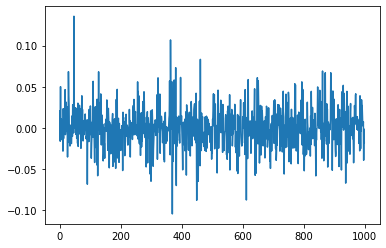

In [21]:
intensities = []
for i in range(1000):
    probe2 = np.random.randint(-1, 2, model2_fpt)
    intensities.append(model2.get_echo_intensity(probe2))
plt.plot(intensities)

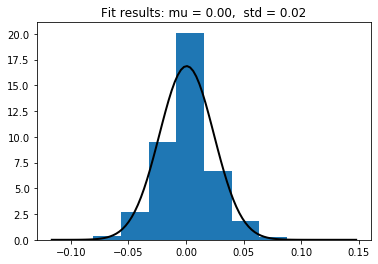

In [22]:
from scipy.stats import norm

mu, std = norm.fit(intensities)

plt.hist(intensities, density=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

Good enough.

# Hintzmann's original experiment

1. Create prototypes (no 0s)
2. Create exemplars which are 
3. ???
4. Profit.

# Mimic experiment 1

Participants received partial features (rhythm/tone) during study, then at test were given a full song.

We will simulate this by creating a list of random probes, `R`.

Memory traces will be added which contain zeros, and some subset of `R`.

We will be comparing trace/probe overlap amount on echo intensity.

In [23]:
model3_fpt = 10
model3_prototypes = 10
model3_rhythm_tone_ratio = 0.7
model3_noise_ratio = 0.5

In [24]:
model3 = Minerva2(model3_fpt)

## Make some random probes

In [25]:
Ps = np.random.randint(-1, 2, (model3_prototypes, model3_fpt))
Ps.shape

(10, 10)

In [26]:
Ps

array([[ 1,  0,  0, -1, -1,  1,  0,  1, -1, -1],
       [ 1, -1, -1,  1, -1,  1,  1,  1,  0,  0],
       [ 0, -1,  1, -1, -1, -1,  0,  0,  1, -1],
       [-1, -1, -1,  1,  1, -1,  1, -1,  1,  0],
       [-1, -1, -1,  1, -1,  0,  0, -1,  1, -1],
       [-1,  0,  0,  0, -1, -1,  0, -1, -1,  0],
       [ 1,  0,  0, -1,  1,  1,  1,  0, -1,  0],
       [-1, -1,  1,  1,  0, -1, -1,  0,  0,  1],
       [-1, -1,  0,  0,  1, -1, -1,  0,  0,  1],
       [ 0,  1,  1,  0,  1,  0, -1, -1, -1,  0]])

## Make rhythm/tone traces

In [27]:
PT_split_index = round(model3_prototypes * model3_noise_ratio)

In [28]:
T_Rs = np.copy(Ps)[:PT_split_index]
T_Ts = np.copy(Ps)[:PT_split_index]

Zero out `proportion` of features

In [29]:
T_Rs.shape

(5, 10)

In [30]:
RT_split_index = round(model3_fpt * model3_rhythm_tone_ratio)

In [31]:
T_Rs[:, :RT_split_index] *= 0
T_Ts[:, RT_split_index:] *= 0

In [32]:
T_Rs

array([[ 0,  0,  0,  0,  0,  0,  0,  1, -1, -1],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, -1],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  1, -1]])

In [33]:
T_Ts

array([[ 1,  0,  0, -1, -1,  1,  0,  0,  0,  0],
       [ 1, -1, -1,  1, -1,  1,  1,  0,  0,  0],
       [ 0, -1,  1, -1, -1, -1,  0,  0,  0,  0],
       [-1, -1, -1,  1,  1, -1,  1,  0,  0,  0],
       [-1, -1, -1,  1, -1,  0,  0,  0,  0,  0]])

Only a certain number of these are kept, though (noise ratio)

## Add traces to model

In [34]:
for T_R in T_Rs:
    model3.add_trace(T_R)
for T_T in T_Ts:
    model3.add_trace(T_T)

In [35]:
model3.model

[array([ 0,  0,  0,  0,  0,  0,  0,  1, -1, -1]),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
 array([ 0,  0,  0,  0,  0,  0,  0,  0,  1, -1]),
 array([ 0,  0,  0,  0,  0,  0,  0, -1,  1,  0]),
 array([ 0,  0,  0,  0,  0,  0,  0, -1,  1, -1]),
 array([ 1,  0,  0, -1, -1,  1,  0,  0,  0,  0]),
 array([ 1, -1, -1,  1, -1,  1,  1,  0,  0,  0]),
 array([ 0, -1,  1, -1, -1, -1,  0,  0,  0,  0]),
 array([-1, -1, -1,  1,  1, -1,  1,  0,  0,  0]),
 array([-1, -1, -1,  1, -1,  0,  0,  0,  0,  0])]

## Get echo intensities for all probes, splitting dis/similar

In [36]:
PRETTY=True

In [37]:
sim_intensities = []
dis_intensities = []
for i, P in enumerate(Ps):
    intensity = model3.get_echo_intensity(P)
    if i < PT_split_index:
        sim_intensities.append(intensity)
    else:
        dis_intensities.append(intensity)
    if PRETTY:
        model3.pretty_print(P)

PROBE: [1, 0, 0, -1, -1, 1, 0, 1, -1, -1]
TRACE 0: [0, 0, 0, 0, 0, 0, 0, 1, -1, -1] ->  0.300^3 =    0.027
TRACE 1: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] ->  0.100^3 =    0.001
TRACE 2: [0, 0, 0, 0, 0, 0, 0, 0, 1, -1] ->  0.000^3 =    0.000
TRACE 3: [0, 0, 0, 0, 0, 0, 0, -1, 1, 0] -> -0.200^3 =   -0.008
TRACE 4: [0, 0, 0, 0, 0, 0, 0, -1, 1, -1] -> -0.100^3 =   -0.001
TRACE 5: [1, 0, 0, -1, -1, 1, 0, 0, 0, 0] ->  0.400^3 =    0.064
TRACE 6: [1, -1, -1, 1, -1, 1, 1, 0, 0, 0] ->  0.200^3 =    0.008
TRACE 7: [0, -1, 1, -1, -1, -1, 0, 0, 0, 0] ->  0.100^3 =    0.001
TRACE 8: [-1, -1, -1, 1, 1, -1, 1, 0, 0, 0] -> -0.400^3 =   -0.064
TRACE 9: [-1, -1, -1, 1, -1, 0, 0, 0, 0, 0] -> -0.100^3 =   -0.001
--------------------------------------------------------------------------------
                                                                           0.003
PROBE: [1, -1, -1, 1, -1, 1, 1, 1, 0, 0]
TRACE 0: [0, 0, 0, 0, 0, 0, 0, 1, -1, -1] ->  0.100^3 =    0.001
TRACE 1: [0, 0, 0, 0, 0, 0, 0, 1, 0, 

## Analyze

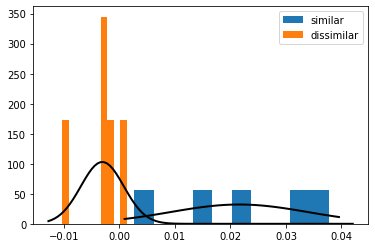

In [38]:
from scipy.stats import norm

mu, std = norm.fit(sim_intensities)

plt.hist(sim_intensities, density=True, label='similar')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
#title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
#plt.title(title)
mu, std = norm.fit(dis_intensities)

plt.hist(dis_intensities, density=True, label='dissimilar')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
#title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
#plt.title(title)
plt.legend()

plt.show()

## REPEAT!

In [48]:
# tunable variables
FPT = 1000
N_PROTOTYPES = 1000
RHYTHM_TONE_RATIO = 0.7
NOISE_RATIO = 0.5

for _ in range(10):
    # create model
    model_both = Minerva2(FPT)
    model_none = Minerva2(FPT)
    model_tone = Minerva2(FPT)
    model_rhythm = Minerva2(FPT)
    # create probes
    Ps = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
    PT_split_index = round(N_PROTOTYPES * NOISE_RATIO)

    # create traces (subset of probes)
    T_Rs = np.copy(Ps)[:PT_split_index]
    T_Ts = np.copy(Ps)[:PT_split_index]

    # zero out parts of traces (symmetrically)
    RT_split_index = round(FPT * RHYTHM_TONE_RATIO)

    T_Rs[:, :RT_split_index] *= 0
    T_Ts[:, RT_split_index:] *= 0

    # add traces to model
    for T_R in T_Rs:
        model_both.add_trace(T_R)
        model_rhythm.add_trace(T_R)
    for T_T in T_Ts:
        model_both.add_trace(T_T)
        model_tone.add_trace(T_T)
        
    for rand_trace in np.random.randint(-1, 2, (round(N_PROTOTYPES * NOISE_RATIO), FPT)):
        model_none.add_trace(rand_trace)

    # get echo intensities
    sim_intensities_none = []
    sim_intensities_both = []
    sim_intensities_tone = []
    sim_intensities_rhythm = []
    dis_intensities_none = []
    dis_intensities_both = []
    dis_intensities_tone = []
    dis_intensities_rhythm = []
    for i, P in enumerate(Ps):
        intensity_none = model_none.get_echo_intensity(P)
        intensity_both = model_both.get_echo_intensity(P)
        intensity_tone = model_tone.get_echo_intensity(P)
        intensity_rhythm = model_rhythm.get_echo_intensity(P)
        if i < PT_split_index:
            sim_intensities_none.append(intensity_none)
            sim_intensities_both.append(intensity_both)
            sim_intensities_tone.append(intensity_tone)
            sim_intensities_rhythm.append(intensity_rhythm)
        else:
            dis_intensities_none.append(intensity_none)
            dis_intensities_both.append(intensity_both)
            dis_intensities_tone.append(intensity_tone)
            dis_intensities_rhythm.append(intensity_rhythm)

    ax, fig = plt.subplots((1, 1))
    # plot histograms and normal PDFs
    show_densities(sim_intensities_none, dis_intensities_none, 'No overlap')
    show_densities(sim_intensities_both, dis_intensities_both, 'Tone and Rhythm overlap')
    show_densities(sim_intensities_tone, dis_intensities_tone, 'Tone only overlap')
    show_densities(sim_intensities_rhythm, dis_intensities_rhythm, 'Rhythm only overlap')

    plt.figure(figsize=(14,7))

    mu1, std1 = norm.fit(a)
    mu2, std2 = norm.fit(b)

    ax.hist(a, density=True, label='similar')
    ax.hist(b, density=True, label='dissimilar')

    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 10000)

    p1 = norm.pdf(x, mu1, std1)
    ax.plot(x, p1, 'k',linewidth=2, label='$\mu$ = %.2e, $\sigma$ = %.2e' % (mu1, std1))

    p2 = norm.pdf(x, mu2, std2)
    ax.plot(x, p2, 'b', linewidth=2, label='$\mu$ = %.2e, $\sigma$ = %.2e' % (mu2, std2))

    plt.title(title + " - Intensity as a function of similarity (histogram, and PDFs)")
    plt.legend()
    plt.xlabel("Echo Intensity")
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()
    break

TypeError: int() argument must be a string, a bytes-like object or a number, not 'tuple'

<Figure size 432x288 with 0 Axes>

1. remove unstudied
2. add rhythm only
3. add tone only
4. add noise to everything
5. single studied vs multiple studied

# Round 2!

ding ding

In [61]:
a = np.reshape(np.arange(16), (4, -1))
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [62]:
a[0]

array([0, 1, 2, 3])

In [63]:
a[0, 2]

2

In [75]:
a[0][2]

2

In [66]:
a[0:2]

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [67]:
a[:2]

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [69]:
a[2:]

array([[ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [74]:
a[:, :]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [221]:
# tunable variables
FPT = 100
N_PROTOTYPES = 100
TONE_RHYTHM_RATIO = 0.7

# create model
model = Minerva2(FPT)
# create probes
Ps_unstudied = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
Ps_both = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
Ps_rhythm = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
Ps_tone = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))

In [222]:
# create traces (subset of probes)
T_Rs = np.copy(Ps_rhythm)
T_Ts = np.copy(Ps_tone)
T_Bs = Ps_both

In [223]:
# zero out parts of traces (symmetrically)
RT_split_index = round(FPT * TONE_RHYTHM_RATIO)

T_Rs[:, :RT_split_index] *= 0
T_Ts[:, RT_split_index:] *= 0

In [224]:
# add traces to model
for T_R in T_Rs:
    model.add_trace(T_R)
for T_T in T_Ts:
    model.add_trace(T_T)
for T_B in T_Bs:
    model.add_trace(T_B)

In [225]:
# Add random noise traces
#     for rand_trace in np.random.randint(-1, 2, (round(N_PROTOTYPES * NOISE_RATIO), FPT)):
#         model.add_trace(rand_trace)

# get echo intensities
tone_intensities = [model.get_echo_intensity(p) for p in Ps_tone]
rhythm_intensities = [model.get_echo_intensity(p) for p in Ps_rhythm]
both_intensities = [model.get_echo_intensity(p) for p in Ps_both]
unstudied_intensities = [model.get_echo_intensity(p) for p in Ps_unstudied]

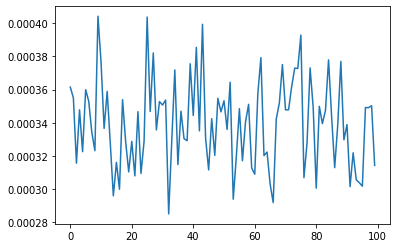

In [226]:
plt.plot(tone_intensities)

In [227]:
model2 = Minerva2(FPT)

In [228]:
# add traces to model
model2.add_traces(T_Rs)
model2.add_traces(T_Ts)
model2.add_traces(T_Bs)

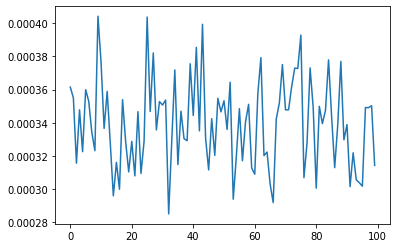

In [229]:
model_arr = np.array(model.model)
similarities = (Ps_tone @ model_arr.T)/Ps_tone.shape[1]
activations = similarities**3
intensities = np.mean(activations, axis=1)
plt.plot(intensities)

In [230]:
# plot histograms and normal PDFs
plt.figure(figsize=(14,7))

mu_tone, std_tone = norm.fit(tone_intensities)
mu_rhythm, std_rhythm = norm.fit(rhythm_intensities)
mu_both, std_both = norm.fit(both_intensities)
mu_unstudied, std_unstudied = norm.fit(unstudied_intensities)

<Figure size 1008x504 with 0 Axes>

(array([ 581.32646841,  290.66323421,  871.98970262, 2615.96910785,
        5813.2646841 , 5813.2646841 , 6394.59115251, 4069.28527887,
        1162.65293682, 1453.31617103]),
 array([0.00078878, 0.00082319, 0.00085759, 0.000892  , 0.0009264 ,
        0.0009608 , 0.00099521, 0.00102961, 0.00106402, 0.00109842,
        0.00113282]),
 <a list of 10 Patch objects>)

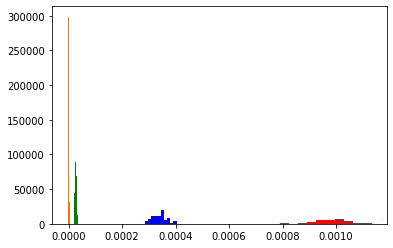

In [231]:
plt.hist(unstudied_intensities, color='xkcd:orange', density=True)
plt.hist(tone_intensities, color='b', density=True)
plt.hist(rhythm_intensities, color='g', density=True)
plt.hist(both_intensities, color='r', density=True)

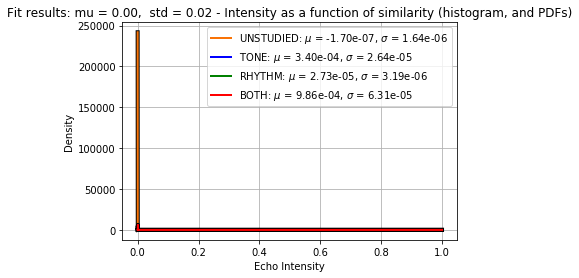

In [232]:
#plt.xlim(-1e-4, .001)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 10000)

p_unstudied = norm.pdf(x, mu_unstudied, std_unstudied)
plt.plot(x, p_unstudied, 'k',linewidth=4)
plt.plot(x, p_unstudied, 'xkcd:orange',linewidth=2, label='UNSTUDIED: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_unstudied, std_unstudied))

p_tone = norm.pdf(x, mu_tone, std_tone)
plt.plot(x, p_tone, 'k',linewidth=4)
plt.plot(x, p_tone, 'b',linewidth=2, label='TONE: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_tone, std_tone))

p_rhythm = norm.pdf(x, mu_rhythm, std_rhythm)
plt.plot(x, p_rhythm, 'k',linewidth=4)
plt.plot(x, p_rhythm, 'g',linewidth=2, label='RHYTHM: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_rhythm, std_rhythm))

p_both = norm.pdf(x, mu_both, std_both)
plt.plot(x, p_both, 'k',linewidth=4)
plt.plot(x, p_both, 'r',linewidth=2, label='BOTH: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_both, std_both))

plt.title(title + " - Intensity as a function of similarity (histogram, and PDFs)")
plt.legend()
plt.xlabel("Echo Intensity")
plt.ylabel("Density")
plt.grid(True)
plt.show()

## Slower!

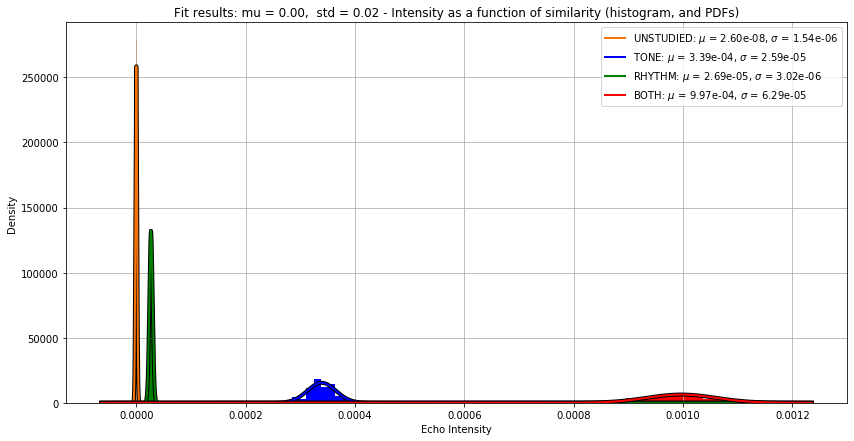

_,U,T,R,B
U,1.0,1.5164729011605833e-193,1.2448385705084368e-151,3.927646728818089e-210,
T,1.5164729011605833e-193,1.0,4.230673846390112e-186,3.167331822496857e-168,
R,1.2448385705084368e-151,4.230673846390112e-186,1.0,1.0031396978096867e-207,
B,3.927646728818089e-210,3.167331822496857e-168,1.0031396978096867e-207,1.0,


In [278]:
# tunable variables
FPT = 1000
N_PROTOTYPES = 100
TONE_RHYTHM_RATIO = 0.7

# create model
model = Minerva2(FPT)
# create probes
Ps_unstudied = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
Ps_both = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
Ps_rhythm = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
Ps_tone = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))

# create traces (subset of probes)
T_Rs = np.copy(Ps_rhythm)
T_Ts = np.copy(Ps_tone)
T_Bs = Ps_both

# zero out parts of traces (symmetrically)
RT_split_index = round(FPT * TONE_RHYTHM_RATIO)

T_Rs[:, :RT_split_index] *= 0
T_Ts[:, RT_split_index:] *= 0

# add traces to model

model.add_traces(T_Rs)
model.add_traces(T_Ts)
model.add_traces(T_Bs)

# get echo intensities
tone_intensities = [model.get_echo_intensity(p) for p in Ps_tone]
rhythm_intensities = [model.get_echo_intensity(p) for p in Ps_rhythm]
both_intensities = [model.get_echo_intensity(p) for p in Ps_both]
unstudied_intensities = [model.get_echo_intensity(p) for p in Ps_unstudied]

# plot histograms and normal PDFs
plt.figure(figsize=(14,7))

mu_tone, std_tone = norm.fit(tone_intensities)
mu_rhythm, std_rhythm = norm.fit(rhythm_intensities)
mu_both, std_both = norm.fit(both_intensities)
mu_unstudied, std_unstudied = norm.fit(unstudied_intensities)

plt.hist(unstudied_intensities, color='xkcd:orange', density=True)
plt.hist(tone_intensities, color='b', density=True)
plt.hist(rhythm_intensities, color='g', density=True)
plt.hist(both_intensities, color='r', density=True)

#plt.xlim(-1e-4, .001)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 10000)

p_unstudied = norm.pdf(x, mu_unstudied, std_unstudied)
plt.plot(x, p_unstudied, 'k',linewidth=4)
plt.plot(x, p_unstudied, 'xkcd:orange',linewidth=2, label='UNSTUDIED: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_unstudied, std_unstudied))

p_tone = norm.pdf(x, mu_tone, std_tone)
plt.plot(x, p_tone, 'k',linewidth=4)
plt.plot(x, p_tone, 'b',linewidth=2, label='TONE: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_tone, std_tone))

p_rhythm = norm.pdf(x, mu_rhythm, std_rhythm)
plt.plot(x, p_rhythm, 'k',linewidth=4)
plt.plot(x, p_rhythm, 'g',linewidth=2, label='RHYTHM: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_rhythm, std_rhythm))

p_both = norm.pdf(x, mu_both, std_both)
plt.plot(x, p_both, 'k',linewidth=4)
plt.plot(x, p_both, 'r',linewidth=2, label='BOTH: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_both, std_both))

plt.title(title + " - Intensity as a function of similarity (histogram, and PDFs)")
plt.legend()
plt.xlabel("Echo Intensity")
plt.ylabel("Density")
plt.grid(True)
plt.show()

labels = ['U','T','R','B']
results = [unstudied_intensities, tone_intensities, rhythm_intensities, both_intensities]
print('_,U,T,R,B')
for i, row in enumerate(results):
    print(labels[i], end=',')
    for col in results:
        print(ttest_ind(row, col).pvalue, end=',')
    print()

## Faster!

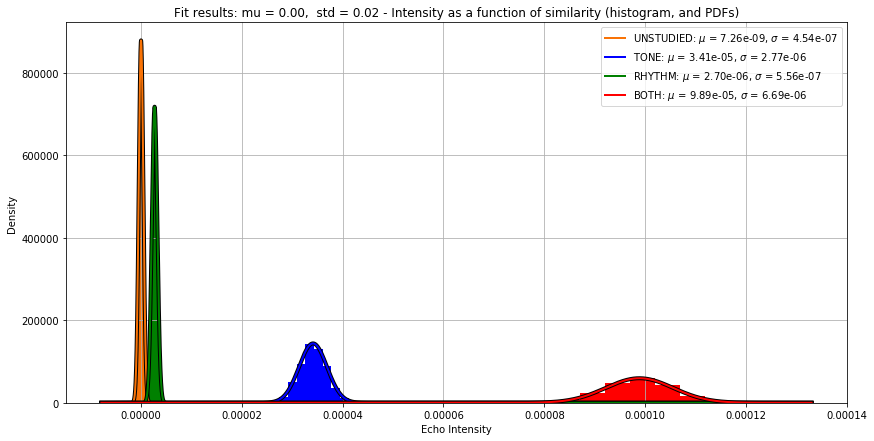

In [299]:
# tunable variables
FPT = 1000
N_PROTOTYPES = 1000
TONE_RHYTHM_RATIO = 0.7

# create model
model = Minerva2(FPT)

# create probes
Ps_unstudied = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
Ps_both = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
Ps_rhythm = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))
Ps_tone = np.random.randint(-1, 2, (N_PROTOTYPES, FPT))

# create traces (subset of probes)
T_Rs = np.copy(Ps_rhythm)
T_Ts = np.copy(Ps_tone)
T_Bs = Ps_both

# zero out parts of traces (symmetrically)
RT_split_index = round(FPT * TONE_RHYTHM_RATIO)

T_Rs[:, :RT_split_index] *= 0
T_Ts[:, RT_split_index:] *= 0

# add traces to model
model.add_traces(T_Rs)
model.add_traces(T_Ts)
model.add_traces(T_Bs)

# get echo intensities
tone_intensities = model.get_echo_intensities(Ps_tone)
rhythm_intensities = model.get_echo_intensities(Ps_rhythm)
both_intensities = model.get_echo_intensities(Ps_both)
unstudied_intensities = model.get_echo_intensities(Ps_unstudied)

# plot histograms and normal PDFs
plt.figure(figsize=(14,7))

mu_tone, std_tone = norm.fit(tone_intensities)
mu_rhythm, std_rhythm = norm.fit(rhythm_intensities)
mu_both, std_both = norm.fit(both_intensities)
mu_unstudied, std_unstudied = norm.fit(unstudied_intensities)

plt.hist(unstudied_intensities, color='xkcd:orange', density=True)
plt.hist(tone_intensities, color='b', density=True)
plt.hist(rhythm_intensities, color='g', density=True)
plt.hist(both_intensities, color='r', density=True)
#plt.xlim(-1e-4, .001)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 10000)

p_unstudied = norm.pdf(x, mu_unstudied, std_unstudied)
plt.plot(x, p_unstudied, 'k',linewidth=4)
plt.plot(x, p_unstudied, 'xkcd:orange',linewidth=2, label='UNSTUDIED: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_unstudied, std_unstudied))

p_tone = norm.pdf(x, mu_tone, std_tone)
plt.plot(x, p_tone, 'k',linewidth=4)
plt.plot(x, p_tone, 'b',linewidth=2, label='TONE: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_tone, std_tone))

p_rhythm = norm.pdf(x, mu_rhythm, std_rhythm)
plt.plot(x, p_rhythm, 'k',linewidth=4)
plt.plot(x, p_rhythm, 'g',linewidth=2, label='RHYTHM: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_rhythm, std_rhythm))

p_both = norm.pdf(x, mu_both, std_both)
plt.plot(x, p_both, 'k',linewidth=4)
plt.plot(x, p_both, 'r',linewidth=2, label='BOTH: $\mu$ = %.2e, $\sigma$ = %.2e' % (mu_both, std_both))

plt.title(title + " - Intensity as a function of similarity (histogram, and PDFs)")
plt.legend()
plt.xlabel("Echo Intensity")
plt.ylabel("Density")
plt.grid(True)
plt.show()